In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("air-traffic-passenger-statistics.csv")

In [3]:
pd.set_option("display.max_columns", None)
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [5]:
airline_count = df["Operating Airline"].value_counts()
airline_count

United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
Trego Dugan Aviation                   2
Evergreen International Airlines       2
Icelandair EHF                         2
Xtra Airways                           2
Boeing Company                         1
Name: Operating Airline, Length: 89, dtype: int64

In [6]:
passenger_count = df.groupby("Operating Airline")["Passenger Count"].sum()
passenger_count

Operating Airline
ABC Aerolineas S.A. de C.V. dba Interjet      15585
ATA Airlines                                 384764
Aer Lingus                                   777691
Aeromexico                                  1672946
Air Berlin                                   235155
                                             ...   
WOW Air                                      295168
WestJet Airlines                             799801
World Airways                                   785
XL Airways France                            118961
Xtra Airways                                    146
Name: Passenger Count, Length: 89, dtype: int64

In [7]:
x = airline_count.values
y = passenger_count.values
X = np.array(list(zip(x,y)))

In [8]:
X

array([[     2154,     15585],
       [     1653,    384764],
       [     1212,    777691],
       [      891,   1672946],
       [      462,    235155],
       [      445,   8804894],
       [      420,      4119],
       [      390,   2260334],
       [      380,   3801038],
       [      317,    293499],
       [      314,   2380307],
       [      313,     67815],
       [      313,   2388648],
       [      313,  17540235],
       [      312,   2016793],
       [      312,     24269],
       [      312,  43622387],
       [      312,    424692],
       [      312,       110],
       [      312,   1954588],
       [      312,     47892],
       [      312,        68],
       [      312,      9138],
       [      312,        18],
       [      312,   5553732],
       [      312,    412238],
       [      312,   5546810],
       [      312,   3100301],
       [      312,    866539],
       [      305,    542298],
       [      304,   3478144],
       [      256,  34813833],
       [

In [9]:
df1 = pd.DataFrame(X)

In [10]:
df1

,0,1
0,2154,15585
1,1653,384764
2,1212,777691
3,891,1672946
4,462,235155
...,...,...
84,2,295168
85,2,799801
86,2,785
87,2,118961


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       89 non-null     int64
 1   1       89 non-null     int64
dtypes: int64(2)
memory usage: 1.5 KB


In [12]:
model = KMeans(n_clusters=4)
model=model.fit(df1)

In [13]:
pred=model.predict(df1)

In [14]:
pred

array([0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       0])

In [15]:
silhouette_score(df1,pred)

0.8270889134566368

In [16]:
clust=df1.assign(Cluster=model.labels_)
model.cluster_centers_.astype("int")
model.labels_

array([0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       0])

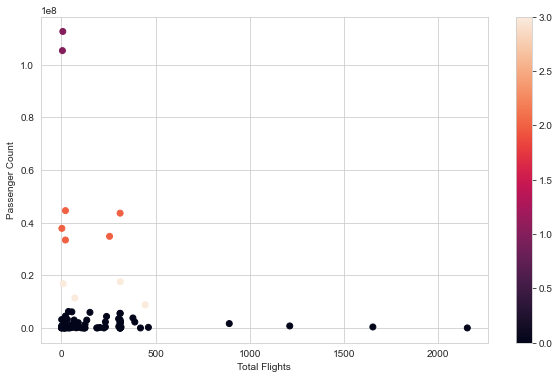

In [17]:
plt.figure(figsize = (10,6))
plt.scatter(df1[0],df1[1], c=pred)
plt.xlabel("Total Flights")
plt.ylabel("Passenger Count")
plt.colorbar()
plt.show()

In [18]:
allscore = []
allclusters=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        pred=model.fit_predict(df1)
        score=silhouette_score(df1,pred)
        print(f'Number of cluster {no_of_cluster}, silhouette {score}')
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)

Number of cluster 2, silhouette 0.9286008774783031
Number of cluster 3, silhouette 0.9124444389037357
Number of cluster 4, silhouette 0.8270889134566368
Number of cluster 5, silhouette 0.7267844869174688
Number of cluster 6, silhouette 0.7269686293407124
Number of cluster 7, silhouette 0.7255430194210364
Number of cluster 8, silhouette 0.7392346174533175
Number of cluster 9, silhouette 0.7192901754027051
Number of cluster 10, silhouette 0.7107631798984916


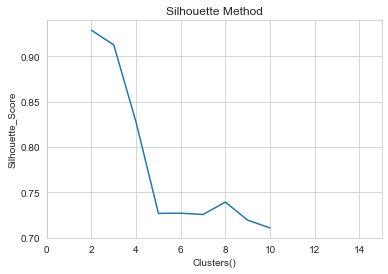

In [19]:
plt.plot(allclusters, allscore)
plt.xlabel("Clusters()")
plt.ylabel("Silhouette_Score")
plt.title("Silhouette Method")
plt.xlim(0,15)
plt.show()

In [20]:
allscore=[]
allclusters=[]
sum_of_squared_distances = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model-model fit(x)
        pred=model.fit_predict(df1)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(df1,pred)
        print ("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)

Number of cluster 2, silhouette 0.9286008774783031
Number of cluster 3, silhouette 0.9124444389037357
Number of cluster 4, silhouette 0.8270889134566368
Number of cluster 5, silhouette 0.7267844869174688
Number of cluster 6, silhouette 0.7269686293407124
Number of cluster 7, silhouette 0.7255430194210364
Number of cluster 8, silhouette 0.7372212089855074
Number of cluster 9, silhouette 0.7192901754027051
Number of cluster 10, silhouette 0.7107631798984916


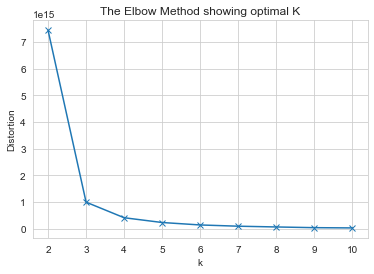

In [21]:
plt.plot(allclusters,sum_of_squared_distances,marker="x")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing optimal K")
plt.show()